In [4]:
import math
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz

import scipy.stats
import scipy.optimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


(0, 6)

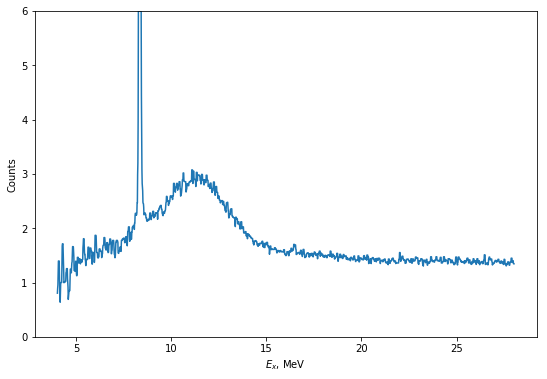

In [5]:
red_4_28 = pd.read_csv('../B(GT) peaks processing/recognition/red data/4_28_red.csv', 
                      sep='\t', decimal=',')

plt.figure(figsize=(9,6))
plt.plot(red_4_28['x'].values, red_4_28['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)

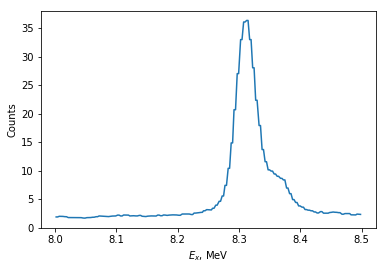

In [6]:
IAS_red = pd.read_csv('../B(GT) peaks processing/recognition/red data/IAS_red.csv', 
                      sep='\t', decimal=',')
plt.plot(IAS_red['x'].values, IAS_red['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

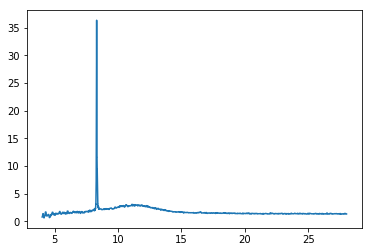

In [7]:
beginning = red_4_28[((red_4_28['x']<8.1))]
middle = IAS_red[((IAS_red['x']>8.1) & (IAS_red['x']<8.65))]
ending = red_4_28[((red_4_28['x']>8.65))]

data = beginning.append(middle).append(ending)

plt.plot(data['x'].values, data['y'].values)

(0, 6)

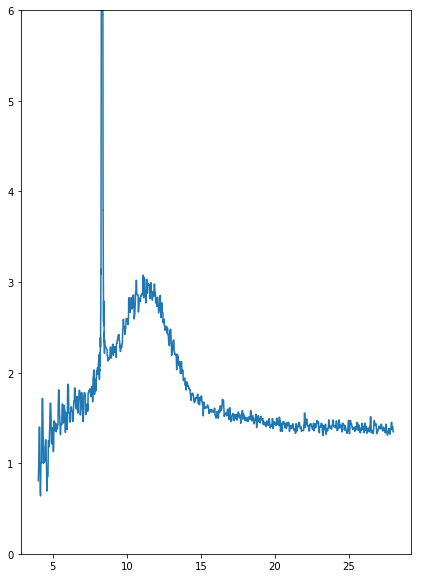

In [8]:
plt.figure(figsize=(7,10))
plt.plot(data['x'].values, data['y'].values)
plt.ylim(0,6)

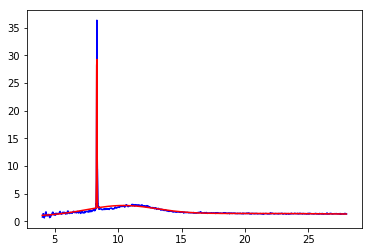

In [9]:
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3)
    return ret


params = [8.3, 11.5, 25, 1, 1, 1, 1, 1, 1]

fitted_params,_ = scipy.optimize.curve_fit(tri_norm, data['x'].values, data['y'].values, p0=params)

plt.plot(data['x'].values, data['y'].values, c='b')
xx = np.linspace(4, 28, 1000)
plt.plot(xx, tri_norm(xx, *fitted_params), c='r')

(0, 6)

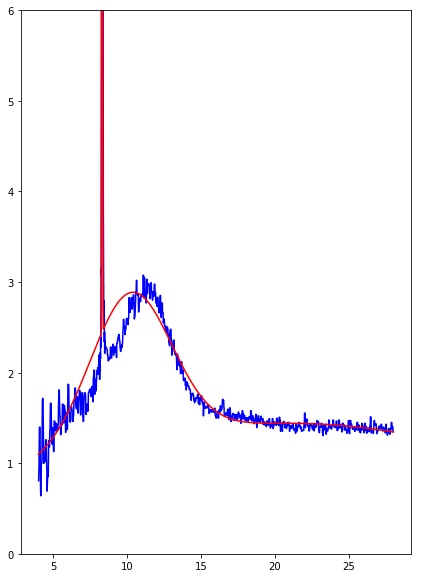

In [10]:
plt.figure(figsize=(7,10))
plt.plot(data['x'].values, data['y'].values, c='b')
plt.plot(xx, tri_norm(xx, *fitted_params), c='r')
plt.ylim(0,6)

### GTR

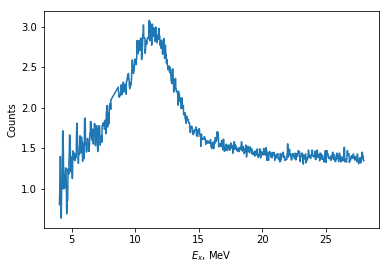

In [11]:
data2 = beginning.append(ending)

plt.plot(data2['x'].values, data2['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

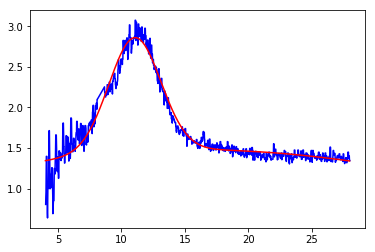

In [12]:
def gauss(x, mu, sigma, k):
    return k*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

def tri_norm2(x, *args):
    m1, m2, s1, s2, k1, k2 = args
    #ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    #ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret = gauss(x, m1, s1, k1)
    ret += gauss(x, m2, s2, k2)
    return ret

params2 = [11.5, 25, 1, 1, 1, 1]

fitted_params2,_ = scipy.optimize.curve_fit(tri_norm2, data2['x'].values, data2['y'].values, p0=params2)

plt.plot(data2['x'].values, data2['y'].values, c='b')
plt.plot(xx, tri_norm2(xx, *fitted_params2), c='r')

In [13]:
fitted_params2

array([ 11.05338743,  16.00027301,   2.04836474,  27.2602351 ,
         1.40655398,   1.47787036])

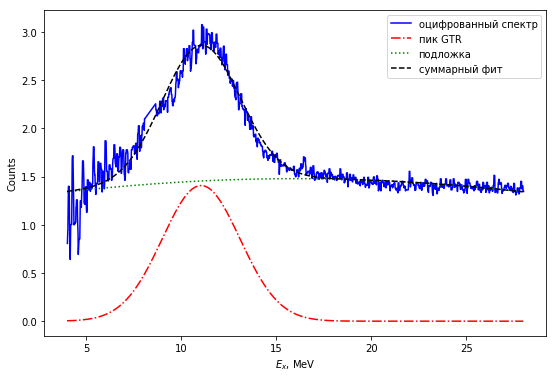

In [17]:
plt.figure(figsize=(9,6))
plt.plot(data2['x'].values, data2['y'].values, c='b', label='оцифрованный спектр')
plt.plot(xx, gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4],), c='r', ls='-.', label='пик GTR')
plt.plot(xx, gauss(xx, fitted_params2[1], fitted_params2[3], fitted_params2[5],), c='g', ls=':', label='подложка')
plt.plot(xx, tri_norm2(xx, *fitted_params2), c='black', ls='--', label='суммарный фит')
plt.legend()
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

plt.savefig('decomposition.png', format='png', dpi=600)

In [15]:
trapz(gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4]), xx)

7.2198614817828259

In [31]:
y_GTR =  gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4],)

In [35]:
y_real = np.interp(xx, xp=data2['x'].values, fp=data2['y'].values)
y_real.shape

(1000,)

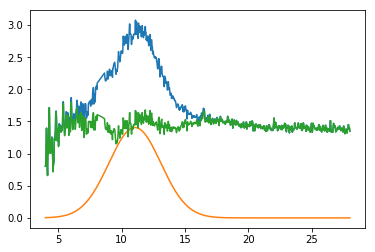

In [42]:
plt.plot(xx, y_real)
plt.plot(xx, y_GTR)
plt.plot(xx, y_real-y_GTR)


(4, 8)

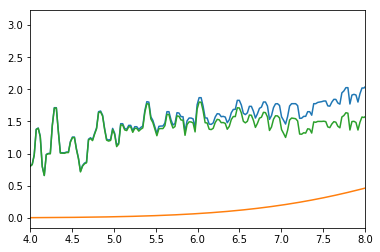

In [43]:
plt.plot(xx, y_real)
plt.plot(xx, y_GTR)
plt.plot(xx, y_real-y_GTR)
plt.xlim(4,8)

### IAS

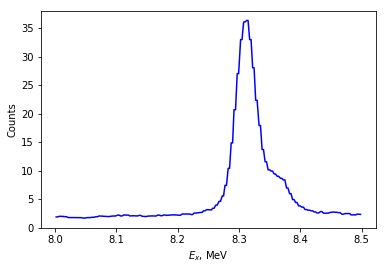

In [13]:
plt.plot(IAS_red['x'].values, IAS_red['y'].values, c='b')
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

array([  8.31025152e+00,   8.33450485e+00,  -1.41850172e-02,
        -3.95164614e-02,   2.73399015e+01,   8.54260856e+00,
         2.09512335e+00])

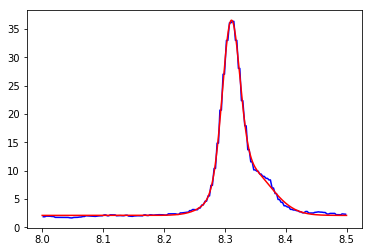

In [14]:
def tri_norm3(x, *args):
    m1, m2, s1, s2, k1, k2, const = args
    #ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    #ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret = const
    ret += gauss(x, m1, s1, k1)
    ret += gauss(x, m2, s2, k2)
    return ret

params3 = [8.3, 8.37, 1, 1, 1, 1, 1]

fitted_params3,_ = scipy.optimize.curve_fit(tri_norm3, IAS_red['x'].values, IAS_red['y'].values, p0=params3)

xx3 = np.linspace(8, 8.5, 500)

plt.plot(IAS_red['x'].values, IAS_red['y'].values, c='b')
plt.plot(xx3, tri_norm3(xx3, *fitted_params3), c='r')

fitted_params3

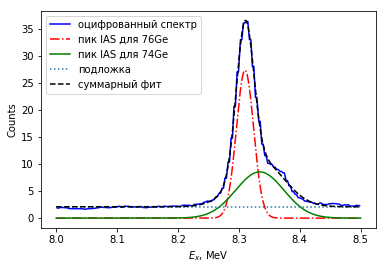

In [15]:
plt.plot(IAS_red['x'].values, IAS_red['y'].values, c='b', label='оцифрованный спектр')
plt.plot(xx3, gauss(xx3, fitted_params3[0], fitted_params3[2], fitted_params3[4],), c='r', ls='-.', label='пик IAS для 76Ge')
plt.plot(xx3, gauss(xx3, fitted_params3[1], fitted_params3[3], fitted_params3[5],), c='g', label='пик IAS для 74Ge')
plt.plot(xx3, fitted_params3[6]*np.ones((xx3.shape)), ls=':', label='подложка')
plt.plot(xx3, tri_norm3(xx3, *fitted_params3), c='black', ls='--', label='суммарный фит')
plt.legend()
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

In [16]:
trapz(gauss(xx3, fitted_params3[0], fitted_params3[2], fitted_params3[4],), xx3)

0.97211299106006299

In [17]:
def gauss_fit2(x, params):
    m1, m2, s1, s2, k1, k2 = params[0],params[1],params[2],params[3],params[4],params[5]
    #ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    #ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret = gauss(x, m1, s1, k1)
    ret += gauss(x, m2, s2, k2)
    return ret


def fit_func(params, data, func):
    #data = data2
    #func = tri_norm2
    
    y = data['y'].values
    x = data['x'].values
    func_y = func(x, params)
    return np.sum( np.abs( y-func_y ) )

res = scipy.optimize.minimize(fit_func, params2, args=(data2, gauss_fit2))

In [18]:
res

      fun: 118.6638275810412
 hess_inv: array([[  7.18507066e-05,  -1.33960230e-03,  -1.32316154e-04,
          1.02296326e-02,   6.33171417e-05,  -3.98431946e-05],
       [ -1.33960230e-03,   3.00761293e-02,   2.56066492e-03,
         -2.12274941e-01,  -1.33025501e-03,   8.56429861e-04],
       [ -1.32316154e-04,   2.56066492e-03,   2.95975780e-04,
         -1.74155174e-02,  -1.21295722e-04,   6.77839852e-05],
       [  1.02296326e-02,  -2.12274941e-01,  -1.74155174e-02,
          1.76817849e+00,   9.82987761e-03,  -6.96170887e-03],
       [  6.33171417e-05,  -1.33025501e-03,  -1.21295722e-04,
          9.82987761e-03,   6.20568672e-05,  -3.96028411e-05],
       [ -3.98431946e-05,   8.56429861e-04,   6.77839852e-05,
         -6.96170887e-03,  -3.96028411e-05,   2.79767402e-05]])
      jac: array([ 0.20341492,  0.02569771, -0.46437645, -0.00562   , -2.44378757,
       -2.94981098])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1772
      nit: 76


In [19]:
res['x']

array([ 11.12419089,  12.8543267 ,   1.89467043,  31.75347961,
         1.38813585,   1.50031247])

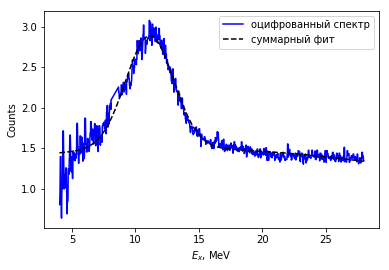

In [20]:
plt.plot(data2['x'].values, data2['y'].values, c='b', label='оцифрованный спектр')
#plt.plot(xx, gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4],), c='r', ls='-.', label='пик GTR')
#plt.plot(xx, gauss(xx, fitted_params2[1], fitted_params2[3], fitted_params2[5],), c='g', ls=':', label='подложка')
plt.plot(xx, gauss_fit2(xx, res['x']), c='black', ls='--', label='суммарный фит')
plt.legend()
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

In [21]:
def gauss_fit5(x, params):
    params = np.reshape(params, (5,3))
    ret = gauss(x, params[0][0],params[0][1],params[0][2])
    ret += gauss(x, params[1][0],params[1][1],params[1][2])
    ret += gauss(x, params[2][0],params[2][1],params[2][2])
    ret += gauss(x, params[3][0],params[3][1],params[3][2])
    ret += gauss(x, params[4][0],params[4][1],params[4][2])
    return ret

res2 = scipy.optimize.minimize(fit_func, np.ones((5*3,)), args=(data2, gauss_fit5))

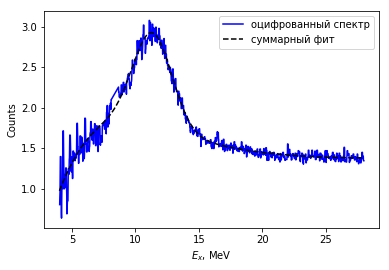

In [22]:
plt.plot(data2['x'].values, data2['y'].values, c='b', label='оцифрованный спектр')
#plt.plot(xx, gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4],), c='r', ls='-.', label='пик GTR')
#plt.plot(xx, gauss(xx, fitted_params2[1], fitted_params2[3], fitted_params2[5],), c='g', ls=':', label='подложка')
plt.plot(xx, gauss_fit5(xx, res2['x']), c='black', ls='--', label='суммарный фит')
plt.legend()
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

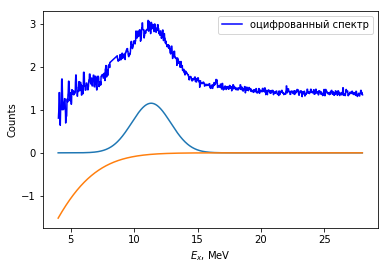

In [23]:
a = np.reshape(res2['x'],(5,3))

plt.plot(data2['x'].values, data2['y'].values, c='b', label='оцифрованный спектр')
#plt.plot(xx, gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4],), c='r', ls='-.', label='пик GTR')
#plt.plot(xx, gauss(xx, fitted_params2[1], fitted_params2[3], fitted_params2[5],), c='g', ls=':', label='подложка')
#plt.plot(xx, gauss(xx, a[0][0], a[0][1], a[0][2]))
plt.plot(xx, gauss(xx, a[1][0], a[1][1], a[1][2]))
plt.plot(xx, gauss(xx, a[2][0], a[2][1], a[2][2]))
#plt.plot(xx, gauss(xx, a[3][0], a[3][1], a[3][2]))
#plt.plot(xx, gauss(xx, a[4][0], a[4][1], a[4][2]))
plt.legend()
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

In [24]:
np.reshape(res2['x'],(5,3))

array([[ -2.84407032e+01,   4.23565712e+01,   9.35955208e+00],
       [  1.13383249e+01,   1.53740032e+00,   1.15194610e+00],
       [ -3.19039737e+00,   4.60109458e+00,  -5.14160472e+00],
       [  3.41819576e+00,   2.23376936e+01,  -4.41246133e+00],
       [ -3.02547511e+02,   1.99126490e+02,  -2.50133396e-01]])

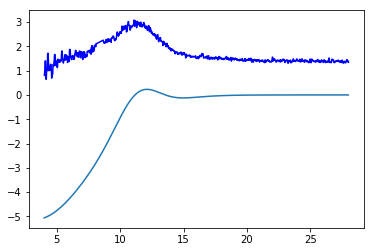

In [25]:
b=gauss(xx, a[1][0], a[1][1], a[1][2])+gauss(xx, -a[2][0], a[2][1], a[2][2])

plt.plot(data2['x'].values, data2['y'].values, c='b', label='оцифрованный спектр')
plt.plot(xx, b)

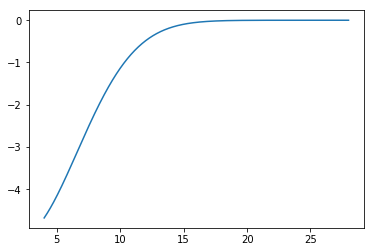

In [26]:
plt.plot(xx, gauss(xx, [2][0], a[2][1], a[2][2]))

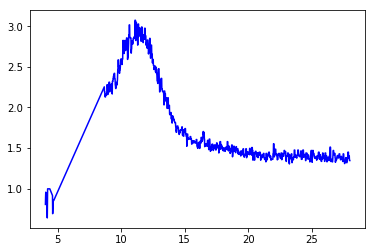

In [27]:
b2=beginning[((beginning['y']<1.0))] 
data3 = b2.append(ending)
plt.plot(data3['x'].values, data3['y'].values, c='b', label='оцифрованный спектр')

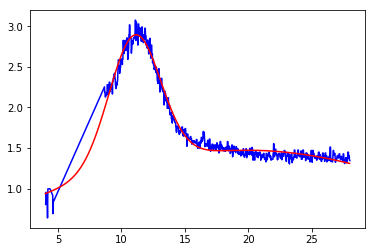

In [28]:
params2 = [11.5, 25, 1, 1, 1, 1]

fitted_params6,_ = scipy.optimize.curve_fit(tri_norm2, data3['x'].values, data3['y'].values, p0=params2)

plt.plot(data3['x'].values, data3['y'].values, c='b')
plt.plot(xx, tri_norm2(xx, *fitted_params6), c='r')

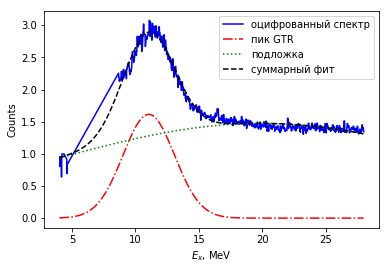

In [29]:
plt.plot(data3['x'].values, data3['y'].values, c='b', label='оцифрованный спектр')
plt.plot(xx, gauss(xx, fitted_params6[0], fitted_params6[2], fitted_params6[4],), c='r', ls='-.', label='пик GTR')
plt.plot(xx, gauss(xx, fitted_params6[1], fitted_params6[3], fitted_params6[5],), c='g', ls=':', label='подложка')
plt.plot(xx, tri_norm2(xx, *fitted_params6), c='black', ls='--', label='суммарный фит')
plt.legend()
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

In [30]:
fitted_params6

array([ 11.05004922,  19.92622608,   2.0333743 ,  16.72988422,
         1.61368815,   1.47346239])